In [1]:
# change the cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
pd.options.display.max_rows=None
pd.options.display.max_columns=None

# Importing Basic Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import matplotlib as mpl
mpl.style.use('ggplot')

# Data Acquisition

In [5]:
df = pd.read_csv('OnlineNewsPopularity.csv')

In [6]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


# PCA

PCA is essentially a method that reduces the dimension of the feature space in such a way that new variables are orthogonal to each other (i.e. they are independent or not correlated). 

## Scaling

In [7]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [8]:
df2 = df.iloc[:,1:]

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()#instantiate
scaler.fit(df2)
df_scaled = scaler.transform(df2)
df_scaled

array([[ 1.75788035,  0.75744723, -0.69521045, ..., -1.81071884,
         0.13891975, -0.24102756],
       [ 1.75788035, -0.66165665, -0.61879381, ...,  0.83774863,
        -0.68965812, -0.23087859],
       [ 1.75788035, -0.66165665, -0.71219192, ...,  0.83774863,
        -0.68965812, -0.16301816],
       ...,
       [-1.61808342, -0.18862202, -0.2218518 , ..., -1.56994907,
        -0.08705603, -0.12861489],
       [-1.61808342, -2.08076053,  0.28759248, ...,  0.83774863,
        -0.68965812, -0.19742142],
       [-1.61808342, -0.18862202, -0.82681689, ..., -0.92789635,
         0.41511238, -0.18021979]])

## Apply PCA

In [9]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

.95 for the number of components parameter. It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.

In [10]:
pca.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [11]:
df_scaled_pca = pca.transform(df_scaled)

In [12]:
# You can find out how many components PCA choose after fitting the model using pca.n_components_ . 
# In this case, 95% of the variance amounts to 330 principal components.
pca.n_components_

38

In [13]:
# variance by each component
pca.explained_variance_.round(2)

array([4.88, 4.13, 3.61, 3.  , 2.81, 2.59, 2.54, 2.29, 2.13, 2.08, 2.  ,
       1.89, 1.66, 1.39, 1.37, 1.24, 1.23, 1.21, 1.19, 1.17, 1.13, 1.09,
       1.05, 0.98, 0.91, 0.87, 0.81, 0.72, 0.68, 0.66, 0.61, 0.57, 0.56,
       0.53, 0.47, 0.46, 0.44, 0.41])

In [14]:
# explained variance ratio in terms of percentage of each PC component
exp_var = pca.explained_variance_ratio_
exp_var = np.round(exp_var*100, decimals=1)
exp_var

array([8.1, 6.9, 6. , 5. , 4.7, 4.3, 4.2, 3.8, 3.5, 3.5, 3.3, 3.1, 2.8,
       2.3, 2.3, 2.1, 2. , 2. , 2. , 2. , 1.9, 1.8, 1.7, 1.6, 1.5, 1.4,
       1.4, 1.2, 1.1, 1.1, 1. , 1. , 0.9, 0.9, 0.8, 0.8, 0.7, 0.7])

In [15]:
# Cumulative explained variance ratio

# if i want to capture 80 percent variance i use this
np.cumsum(exp_var)

array([ 8.1, 15. , 21. , 26. , 30.7, 35. , 39.2, 43. , 46.5, 50. , 53.3,
       56.4, 59.2, 61.5, 63.8, 65.9, 67.9, 69.9, 71.9, 73.9, 75.8, 77.6,
       79.3, 80.9, 82.4, 83.8, 85.2, 86.4, 87.5, 88.6, 89.6, 90.6, 91.5,
       92.4, 93.2, 94. , 94.7, 95.4])

In [16]:
labels = ['PC' + str(x) for x in range(1, len(exp_var)+1)]

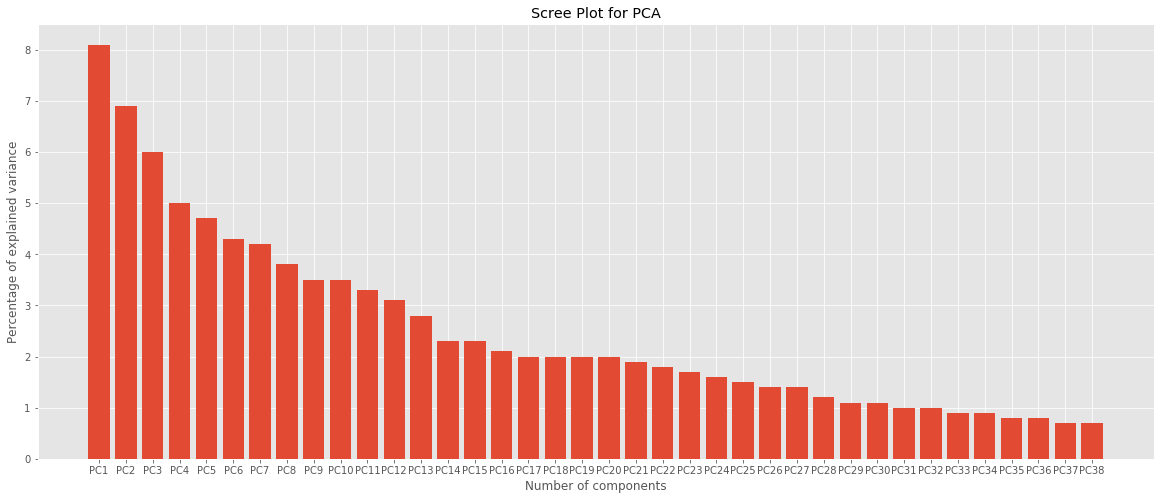

In [17]:
plt.figure(figsize=(20,8))
s = plt.bar(x = range(1, len(exp_var)+1), height = exp_var, tick_label = labels)
plt.xlabel("Number of components")
plt.ylabel("Percentage of explained variance")
plt.title("Scree Plot for PCA")
plt.show()

In [18]:
# pca
df_scaled_pca

array([[-1.34648179, -1.92109268, -1.96165114, ..., -0.05711869,
         0.18727658, -0.80930013],
       [ 0.21200733, -4.32405381, -1.08692318, ...,  0.86675434,
         0.01389532, -0.41399143],
       [-3.71738   , -3.53324826, -1.70058596, ..., -0.57026173,
        -0.69138673, -0.68377003],
       ...,
       [ 0.47004952,  2.63954765,  0.0234722 , ..., -0.89567761,
        -0.57005601,  1.0408702 ],
       [ 3.58087321,  0.20797442, -3.17201431, ..., -0.23334651,
         0.10592143,  1.21826544],
       [ 0.7852592 ,  0.62248651,  2.27154452, ..., -0.67127838,
        -0.45231596,  1.14452101]])

# Clustering

## Partitioning Clustering - KMeans

### Finding the right number of clusters

In [19]:
cluster_range=range(1,10)
cluster_wss=[]

from sklearn.cluster import KMeans
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(df_scaled_pca)
    cluster_wss.append(clusters.inertia_)    # store WSS of cluster

from collections import OrderedDict
clusters_df=pd.DataFrame(OrderedDict ({'num_clusters':cluster_range, 'cluster_wss': cluster_wss}))
clusters_df[0:9]

,num_clusters,cluster_wss
0,1,2.273929e+06
1,2,2.142218e+06
2,3,2.037614e+06
3,4,1.915494e+06
4,5,1.835149e+06
5,6,1.765033e+06
6,7,1.676816e+06
7,8,1.629847e+06
8,9,1.575499e+06


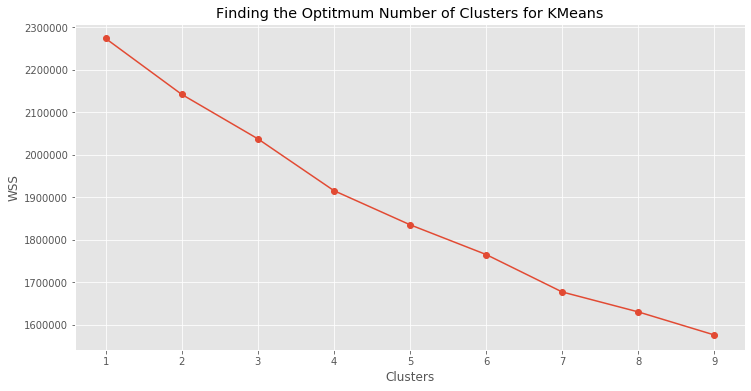

In [20]:
plt.figure(figsize=(12,6))
plt.xlabel('Clusters')
plt.ylabel('WSS')
plt.title('Finding the Optitmum Number of Clusters for KMeans')
plt.xticks(np.arange(min(clusters_df.num_clusters),max(clusters_df.num_clusters)+1, 1.0))  # on x-axis, tick marks after interval of 1
plt.plot(clusters_df.num_clusters, clusters_df.cluster_wss, marker="o")
plt.show()

### Building Cluster model

In [21]:
# kcluster=KMeans(n_clusters=5, random_state=0)
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12, random_state=0)
k_means.fit(df_scaled_pca)
labels = k_means.labels_
print(labels)

[0 2 3 ... 0 1 0]


### Adding CLuster Labels to the scaled dataset

In [22]:
# Creating a scaled DataFrame

df_scaled_2 = pd.DataFrame(df_scaled, columns=df2.columns)
df_scaled_2.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,1.75788,0.757447,-0.695210,0.032772,0.000675,0.038658,-0.607463,-0.335566,-0.426526,-0.304268,0.156474,-1.164821,-0.236445,2.148880,-0.432948,-0.249487,-0.476911,-0.519566,-0.374924,-0.299111,-0.503188,-0.234755,-3.507348,-1.919178,-0.982156,-0.927595,-2.379014,-0.177459,-0.239676,-0.243926,2.225232,-0.478664,-0.480454,-0.473761,-0.409827,-0.256821,-0.272322,-0.388118,1.200633,1.078827,-0.624921,-0.618276,-0.670541,0.670593,-0.275946,0.346403,-0.269079,0.457827,-0.366077,0.237337,0.063865,-0.228941,-0.708369,-0.268895,-0.969886,0.671245,-0.975432,-1.810719,0.138920,-0.241028
1,1.75788,-0.661657,-0.618794,0.016056,0.000675,0.031479,-0.695709,-0.594963,-0.426526,-0.304268,0.432838,-1.688626,-0.236445,-0.465359,2.309747,-0.249487,-0.476911,-0.519566,-0.374924,-0.299111,-0.503188,-0.234755,-3.507348,-1.919178,-0.982156,-0.927595,-2.379014,-0.202587,-0.251766,-0.264412,2.225232,-0.478664,-0.480454,-0.473761,-0.409827,-0.256821,-0.272322,-0.388118,2.339253,-0.415144,-0.589153,-0.588335,-0.636381,-0.875228,0.305774,0.201534,-0.085507,0.269096,-0.136192,-0.640040,-0.870968,-0.228941,1.102174,1.367424,0.078642,-0.870807,-0.269076,0.837749,-0.689658,-0.230879
2,1.75788,-0.661657,-0.712192,0.007645,0.000675,-0.007752,-0.695709,-0.594963,-0.426526,-0.304268,-0.183415,-0.641015,-0.236445,-0.465359,2.309747,-0.249487,-0.476911,-0.519566,-0.374924,-0.299111,-0.503188,-0.234755,-3.507348,-1.919178,-0.982156,-0.927595,-2.379014,-0.156079,-0.229390,-0.226496,2.225232,-0.478664,-0.480454,-0.473761,-0.409827,-0.256821,-0.272322,-0.388118,0.126224,-0.491211,-0.648502,-0.645137,1.549759,2.218418,2.104872,0.989601,-0.658817,0.920026,-0.929060,1.358401,0.063865,0.981798,-1.621797,-0.957871,-0.270867,-0.870807,-0.269076,0.837749,-0.689658,-0.163018
3,1.75788,-0.661657,-0.032933,-0.012619,0.000675,-0.007211,-0.166229,-0.854360,-0.426526,-0.304268,-0.169758,-0.117210,-0.236445,2.148880,-0.432948,-0.249487,-0.476911,-0.519566,-0.374924,-0.299111,-0.503188,-0.234755,-3.507348,-1.919178,-0.982156,-0.927595,-2.379014,-0.202587,-0.251766,-0.264412,2.225232,-0.478664,-0.480454,-0.473761,-0.409827,-0.256821,-0.272322,-0.388118,-0.593319,1.265535,0.986490,-0.660140,-0.710484,-0.115874,-0.191940,0.103648,0.378984,-0.081405,0.290738,0.307442,0.573773,0.174639,-0.862584,-0.268895,-0.620377,-0.870807,-0.269076,0.837749,-0.689658,-0.188821
4,1.75788,1.230482,1.115439,-0.037655,0.000675,-0.045420,0.716237,4.074185,1.860061,-0.304268,0.159400,-0.117210,-0.236445,-0.465359,-0.432948,-0.249487,2.096826,-0.519566,-0.374924,-0.299111,-0.503188,-0.234755,-3.507348,-1.919178,-0.982156,-0.927595,-2.379014,-0.174976,0.138221,-0.134259,2.225232,-0.478664,-0.480454,-0.473761,-0.409827,-0.256821,-0.272322,-0.388118,-0.593092,-0.511879,-0.665431,-0.661269,2.252569,0.601046,1.668164,2.008329,-0.414241,0.936179,-0.948734,0.548135,-0.870968,0.981798,0.307944,0.075594,0.602906,0.531059,0.244637,-1.569949,-0.087056,-0.248596


In [23]:
df_scaled_2["Clus_km"] = labels
df_scaled_2.head(5)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Clus_km
0,1.75788,0.757447,-0.695210,0.032772,0.000675,0.038658,-0.607463,-0.335566,-0.426526,-0.304268,0.156474,-1.164821,-0.236445,2.148880,-0.432948,-0.249487,-0.476911,-0.519566,-0.374924,-0.299111,-0.503188,-0.234755,-3.507348,-1.919178,-0.982156,-0.927595,-2.379014,-0.177459,-0.239676,-0.243926,2.225232,-0.478664,-0.480454,-0.473761,-0.409827,-0.256821,-0.272322,-0.388118,1.200633,1.078827,-0.624921,-0.618276,-0.670541,0.670593,-0.275946,0.346403,-0.269079,0.457827,-0.366077,0.237337,0.063865,-0.228941,-0.708369,-0.268895,-0.969886,0.671245,-0.975432,-1.810719,0.138920,-0.241028,0
1,1.75788,-0.661657,-0.618794,0.016056,0.000675,0.031479,-0.695709,-0.594963,-0.426526,-0.304268,0.432838,-1.688626,-0.236445,-0.465359,2.309747,-0.249487,-0.476911,-0.519566,-0.374924,-0.299111,-0.503188,-0.234755,-3.507348,-1.919178,-0.982156,-0.927595,-2.379014,-0.202587,-0.251766,-0.264412,2.225232,-0.478664,-0.480454,-0.473761,-0.409827,-0.256821,-0.272322,-0.388118,2.339253,-0.415144,-0.589153,-0.588335,-0.636381,-0.875228,0.305774,0.201534,-0.085507,0.269096,-0.136192,-0.640040,-0.870968,-0.228941,1.102174,1.367424,0.078642,-0.870807,-0.269076,0.837749,-0.689658,-0.230879,2
2,1.75788,-0.661657,-0.712192,0.007645,0.000675,-0.007752,-0.695709,-0.594963,-0.426526,-0.304268,-0.183415,-0.641015,-0.236445,-0.465359,2.309747,-0.249487,-0.476911,-0.519566,-0.374924,-0.299111,-0.503188,-0.234755,-3.507348,-1.919178,-0.982156,-0.927595,-2.379014,-0.156079,-0.229390,-0.226496,2.225232,-0.478664,-0.480454,-0.473761,-0.409827,-0.256821,-0.272322,-0.388118,0.126224,-0.491211,-0.648502,-0.645137,1.549759,2.218418,2.104872,0.989601,-0.658817,0.920026,-0.929060,1.358401,0.063865,0.981798,-1.621797,-0.957871,-0.270867,-0.870807,-0.269076,0.837749,-0.689658,-0.163018,3
3,1.75788,-0.661657,-0.032933,-0.012619,0.000675,-0.007211,-0.166229,-0.854360,-0.426526,-0.304268,-0.169758,-0.117210,-0.236445,2.148880,-0.432948,-0.249487,-0.476911,-0.519566,-0.374924,-0.299111,-0.503188,-0.234755,-3.507348,-1.919178,-0.982156,-0.927595,-2.379014,-0.202587,-0.251766,-0.264412,2.225232,-0.478664,-0.480454,-0.473761,-0.409827,-0.256821,-0.272322,-0.388118,-0.593319,1.265535,0.986490,-0.660140,-0.710484,-0.115874,-0.191940,0.103648,0.378984,-0.081405,0.290738,0.307442,0.573773,0.174639,-0.862584,-0.268895,-0.620377,-0.870807,-0.269076,0.837749,-0.689658,-0.188821,0
4,1.75788,1.230482,1.115439,-0.037655,0.000675,-0.045420,0.716237,4.074185,1.860061,-0.304268,0.159400,-0.117210,-0.236445,-0.465359,-0.432948,-0.249487,2.096826,-0.519566,-0.374924,-0.299111,-0.503188,-0.234755,-3.507348,-1.919178,-0.982156,-0.927595,-2.379014,-0.174976,0.138221,-0.134259,2.225232,-0.478664,-0.480454,-0.473761,-0.409827,-0.256821,-0.272322,-0.388118,-0.593092,-0.511879,-0.665431,-0.661269,2.252569,0.601046,1.668164,2.008329,-0.414241,0.936179,-0.948734,0.548135,-0.870968,0.981798,0.307944,0.075594,0.602906,0.531059,0.244637,-1.569949,-0.087056,-0.248596,3


## Cluster Profiling

In [24]:
# df2[df2['Clus_km']==0]
# cluster 0 = lda 3 and lda 1
# cluster 1 = lda 2
# cluster 2 = lda 0
# cluster 3 = lda 4
# cluster 4 = lda in no category

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import shapiro, mannwhitneyu

# Splitting the data

In [27]:
df_scaled_2.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Clus_km
0,1.75788,0.757447,-0.695210,0.032772,0.000675,0.038658,-0.607463,-0.335566,-0.426526,-0.304268,0.156474,-1.164821,-0.236445,2.148880,-0.432948,-0.249487,-0.476911,-0.519566,-0.374924,-0.299111,-0.503188,-0.234755,-3.507348,-1.919178,-0.982156,-0.927595,-2.379014,-0.177459,-0.239676,-0.243926,2.225232,-0.478664,-0.480454,-0.473761,-0.409827,-0.256821,-0.272322,-0.388118,1.200633,1.078827,-0.624921,-0.618276,-0.670541,0.670593,-0.275946,0.346403,-0.269079,0.457827,-0.366077,0.237337,0.063865,-0.228941,-0.708369,-0.268895,-0.969886,0.671245,-0.975432,-1.810719,0.138920,-0.241028,0
1,1.75788,-0.661657,-0.618794,0.016056,0.000675,0.031479,-0.695709,-0.594963,-0.426526,-0.304268,0.432838,-1.688626,-0.236445,-0.465359,2.309747,-0.249487,-0.476911,-0.519566,-0.374924,-0.299111,-0.503188,-0.234755,-3.507348,-1.919178,-0.982156,-0.927595,-2.379014,-0.202587,-0.251766,-0.264412,2.225232,-0.478664,-0.480454,-0.473761,-0.409827,-0.256821,-0.272322,-0.388118,2.339253,-0.415144,-0.589153,-0.588335,-0.636381,-0.875228,0.305774,0.201534,-0.085507,0.269096,-0.136192,-0.640040,-0.870968,-0.228941,1.102174,1.367424,0.078642,-0.870807,-0.269076,0.837749,-0.689658,-0.230879,2
2,1.75788,-0.661657,-0.712192,0.007645,0.000675,-0.007752,-0.695709,-0.594963,-0.426526,-0.304268,-0.183415,-0.641015,-0.236445,-0.465359,2.309747,-0.249487,-0.476911,-0.519566,-0.374924,-0.299111,-0.503188,-0.234755,-3.507348,-1.919178,-0.982156,-0.927595,-2.379014,-0.156079,-0.229390,-0.226496,2.225232,-0.478664,-0.480454,-0.473761,-0.409827,-0.256821,-0.272322,-0.388118,0.126224,-0.491211,-0.648502,-0.645137,1.549759,2.218418,2.104872,0.989601,-0.658817,0.920026,-0.929060,1.358401,0.063865,0.981798,-1.621797,-0.957871,-0.270867,-0.870807,-0.269076,0.837749,-0.689658,-0.163018,3
3,1.75788,-0.661657,-0.032933,-0.012619,0.000675,-0.007211,-0.166229,-0.854360,-0.426526,-0.304268,-0.169758,-0.117210,-0.236445,2.148880,-0.432948,-0.249487,-0.476911,-0.519566,-0.374924,-0.299111,-0.503188,-0.234755,-3.507348,-1.919178,-0.982156,-0.927595,-2.379014,-0.202587,-0.251766,-0.264412,2.225232,-0.478664,-0.480454,-0.473761,-0.409827,-0.256821,-0.272322,-0.388118,-0.593319,1.265535,0.986490,-0.660140,-0.710484,-0.115874,-0.191940,0.103648,0.378984,-0.081405,0.290738,0.307442,0.573773,0.174639,-0.862584,-0.268895,-0.620377,-0.870807,-0.269076,0.837749,-0.689658,-0.188821,0
4,1.75788,1.230482,1.115439,-0.037655,0.000675,-0.045420,0.716237,4.074185,1.860061,-0.304268,0.159400,-0.117210,-0.236445,-0.465359,-0.432948,-0.249487,2.096826,-0.519566,-0.374924,-0.299111,-0.503188,-0.234755,-3.507348,-1.919178,-0.982156,-0.927595,-2.379014,-0.174976,0.138221,-0.134259,2.225232,-0.478664,-0.480454,-0.473761,-0.409827,-0.256821,-0.272322,-0.388118,-0.593092,-0.511879,-0.665431,-0.661269,2.252569,0.601046,1.668164,2.008329,-0.414241,0.936179,-0.948734,0.548135,-0.870968,0.981798,0.307944,0.075594,0.602906,0.531059,0.244637,-1.569949,-0.087056,-0.248596,3


In [28]:
y = df_scaled_2['Clus_km']
X = df_scaled_2.drop(['Clus_km'], axis=1)

# Checking for class Imbalance

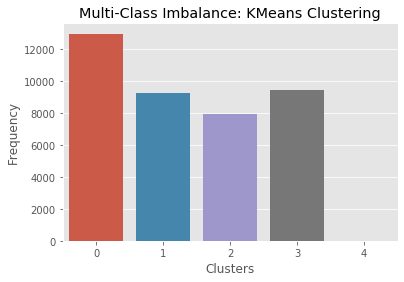

In [29]:
sns.countplot(data=df_scaled_2, x='Clus_km')
plt.ylabel('Frequency')
plt.xlabel('Clusters')
plt.title('Multi-Class Imbalance: KMeans Clustering')
plt.show()

In [30]:
df_scaled_2['Clus_km'].value_counts(normalize=True, ascending=False)*100

0    32.736354
3    23.872465
1    23.373020
2    20.015639
4     0.002522
Name: Clus_km, dtype: float64

In [31]:
# We see that class 4, is much lesser than the rest of the classes.

# Train Test Split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [33]:
print('Training X Shape:', X_train.shape)
print('Training y Shape:', y_train.shape)
print('Testing X Shape:', X_test.shape)
print('Testing y Shape:', y_test.shape)

Training X Shape: (27750, 60)
Training y Shape: (27750,)
Testing X Shape: (11894, 60)
Testing y Shape: (11894,)


## Base Models

### Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(dt.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}


#### Random Search Cross Validation

In [35]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

criterion = ['entropy','gini']
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2','int','float',None]

# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
max_depth = range(1,30)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = range(2,50)



# Create the random grid
random_grid = {'criterion':criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

pprint(random_grid)

{'criterion': ['entropy', 'gini'],
 'max_depth': range(1, 30),
 'max_features': ['auto', 'sqrt', 'log2', 'int', 'float', None],
 'min_samples_leaf': range(2, 50),
 'min_samples_split': [2, 5, 10]}


In [36]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
dt = DecisionTreeClassifier(random_state = 0)
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
dt_random = RandomizedSearchCV(estimator=dt, param_distributions=random_grid,
                              n_iter = 100, scoring='f1_weighted', 
                              cv = 5, verbose=2, random_state=0, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
dt_random.fit(X_train, y_train);

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.1min finished


In [37]:
dt_random.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 14,
 'max_features': None,
 'max_depth': 11,
 'criterion': 'entropy'}

In [38]:
# cv results
cv_results_dt = pd.DataFrame(dt_random.cv_results_)
cv_results_dt.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.186300,0.038151,0.013165,0.010877,10,48,auto,4,entropy,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.689178,0.697679,0.750246,0.747645,0.698139,0.716577,0.026633,64,0.703926,0.700244,0.750094,0.755020,0.696670,0.721191,0.025760
1,0.183908,0.034863,0.011170,0.005931,5,28,log2,22,gini,"{'min_samples_split': 5, 'min_samples_leaf': 2...",0.892937,0.885118,0.890100,0.849807,0.889298,0.881452,0.016019,55,0.902473,0.898651,0.894928,0.878166,0.904950,0.895834,0.009467
2,0.206646,0.050785,0.013165,0.010430,5,46,sqrt,21,gini,"{'min_samples_split': 5, 'min_samples_leaf': 4...",0.906670,0.903867,0.913997,0.891217,0.913095,0.905769,0.008217,33,0.915065,0.909850,0.921058,0.906394,0.921026,0.914679,0.005884
3,0.256712,0.028771,0.014761,0.012090,2,35,auto,25,gini,"{'min_samples_split': 2, 'min_samples_leaf': 3...",0.902006,0.907892,0.882879,0.920371,0.910259,0.904681,0.012410,34,0.909015,0.920547,0.889291,0.928220,0.917094,0.912833,0.013291
4,0.039094,0.012887,0.000000,0.000000,2,27,int,25,entropy,"{'min_samples_split': 2, 'min_samples_leaf': 2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", dt_random.best_score_)
dt_random_best = dt_random.best_estimator_
print(dt_random.best_estimator_)

best accuracy 0.950696100775447
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=11, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=14, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


#### Running the model with best parameters obtained from Random Search CV

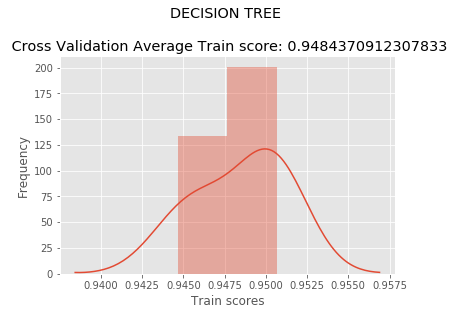

In [40]:
# K-fold cross val
kfold = KFold(shuffle=True, n_splits=5, random_state=0)
cv_results_dt = cross_val_score(dt_random_best, X_train, y_train, cv=kfold, scoring='f1_weighted')
sns.distplot(cv_results_dt)
plt.xlabel('Train scores')
plt.ylabel('Frequency')
plt.title('DECISION TREE \n\n Cross Validation Average Train score: {}'.format(np.mean(cv_results_dt)))
plt.show()

#### Evaluation Metrics

##### Plotting Cross Val score results

In [41]:
from sklearn.model_selection import cross_val_predict

y_dt_pred_train = cross_val_predict(dt_random_best, X_train, y_train, cv=5)
y_dt_pred_test = cross_val_predict(dt_random_best, X_test, y_test, cv=5)

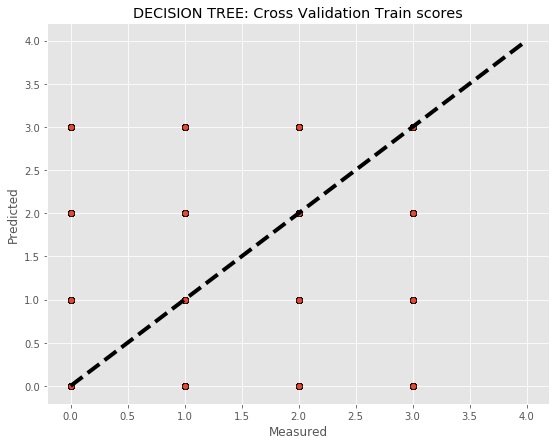

In [42]:
# Random Forest Bagging Cross Validation Train scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_train, y_dt_pred_train, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('DECISION TREE: Cross Validation Train scores')
plt.show()

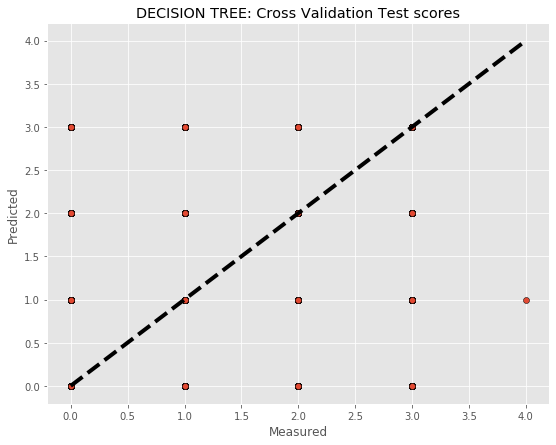

In [43]:
# Random Forest Bagging Cross Validation Test scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_test, y_dt_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('DECISION TREE: Cross Validation Test scores')
plt.show()

##### Classification Report

In [44]:
# classification Report for Train
from sklearn.metrics import classification_report,confusion_matrix
# y_dt_pred_train = dt_random_best.predict(X_train)
print(classification_report(y_train, y_dt_pred_train))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      9099
           1       0.95      0.95      0.95      6524
           2       0.95      0.96      0.95      5558
           3       0.96      0.94      0.95      6569

    accuracy                           0.95     27750
   macro avg       0.95      0.95      0.95     27750
weighted avg       0.95      0.95      0.95     27750



In [45]:
# classification Report for Test
from sklearn.metrics import classification_report,confusion_matrix
# y_dt_pred_test = dt_random_best.predict(X_test)
print(classification_report(y_test, y_dt_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      3879
           1       0.95      0.94      0.95      2742
           2       0.93      0.95      0.94      2377
           3       0.94      0.92      0.93      2895
           4       0.00      0.00      0.00         1

    accuracy                           0.94     11894
   macro avg       0.75      0.75      0.75     11894
weighted avg       0.94      0.94      0.94     11894



##### Confusion Matrix

In [46]:
# confusion matrix for Train
print(confusion_matrix(y_train,y_dt_pred_train))

[[8663  154  146  136]
 [ 154 6220   56   94]
 [ 130   56 5325   47]
 [ 213  114   68 6174]]


In [47]:
# confusion matrix for Test
print(confusion_matrix(y_test,y_dt_pred_test))

[[3642   70   79   88    0]
 [  61 2582   34   65    0]
 [  82   25 2249   21    0]
 [ 122   44   54 2675    0]
 [   0    1    0    0    0]]


##### Cohen Kappa score

In [48]:
# Cohen's Kappa coefficient for Train
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_train, y_dt_pred_train)

0.9334640816767745

In [49]:
# Cohen's Kappa coefficient for Test
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_dt_pred_test)

0.9153811801020912

### Random Forest

In [50]:
rf = RandomForestClassifier(random_state=0)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


#### Random Search Cross Validation

In [51]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators = range(1,50)

# splitting criterion
criterion = ['entropy','gini']

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2','int','float',None]

# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
max_depth = range(1,50)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20]

# Minimum number of samples required at each leaf node
min_samples_leaf = range(1,50)

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion':criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
              }

pprint(random_grid)

{'bootstrap': [True, False],
 'criterion': ['entropy', 'gini'],
 'max_depth': range(1, 50),
 'max_features': ['auto', 'sqrt', 'log2', 'int', 'float', None],
 'min_samples_leaf': range(1, 50),
 'min_samples_split': [2, 5, 10, 15, 20],
 'n_estimators': range(1, 50)}


In [52]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 0)
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 50, scoring='f1_weighted', 
                              cv = 5, verbose=2, random_state=0, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  5.6min finished


In [53]:
rf_random.best_params_

{'n_estimators': 32,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 40,
 'criterion': 'gini',
 'bootstrap': False}

In [54]:
# cv results
cv_results_rf = pd.DataFrame(rf_random.cv_results_)
cv_results_rf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.080985,0.016977,0.000000,0.000000,19,20,26,int,18,entropy,False,"{'n_estimators': 19, 'min_samples_split': 20, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20.229058,3.707079,0.036901,0.008152,7,15,30,None,32,gini,False,"{'n_estimators': 7, 'min_samples_split': 15, '...",0.944329,0.947761,0.950634,0.942847,0.947742,0.946663,0.002762,24,0.954694,0.954936,0.953004,0.953728,0.954005,0.954073,0.000692
2,0.099733,0.011545,0.000000,0.000000,49,15,32,int,21,entropy,True,"{'n_estimators': 49, 'min_samples_split': 15, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.064629,0.005473,0.000000,0.000000,11,5,26,float,31,entropy,True,"{'n_estimators': 11, 'min_samples_split': 5, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.061036,0.018394,0.000000,0.000000,9,20,31,int,23,gini,True,"{'n_estimators': 9, 'min_samples_split': 20, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", rf_random.best_score_)
rf_random_best = rf_random.best_estimator_
print(rf_random_best)

best accuracy 0.9631207578501583
RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=32,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


#### Running the model with best parameters obtained from Random Search CV

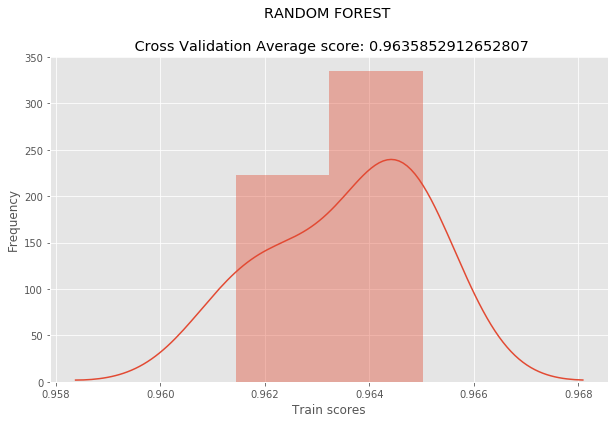

In [56]:
# K-fold cross val
kfold = KFold(shuffle=True, n_splits=5, random_state=0)
cv_results_rf = cross_val_score(rf_random_best, X_train, y_train, cv=kfold, scoring='f1_weighted')
plt.figure(figsize=(10,6))
plt.xlabel('Train scores')
plt.ylabel('Frequency')
sns.distplot(cv_results_rf)
plt.title('RANDOM FOREST \n\n Cross Validation Average score: {}'.format(np.mean(cv_results_rf)))
plt.show()

#### Evaluation Metrics

##### Plotting Cross Val score results

In [57]:
from sklearn.model_selection import cross_val_predict

y_rf_pred_train = cross_val_predict(rf_random_best, X_train, y_train, cv=5)
y_rf_pred_test = cross_val_predict(rf_random_best, X_test, y_test, cv=5)

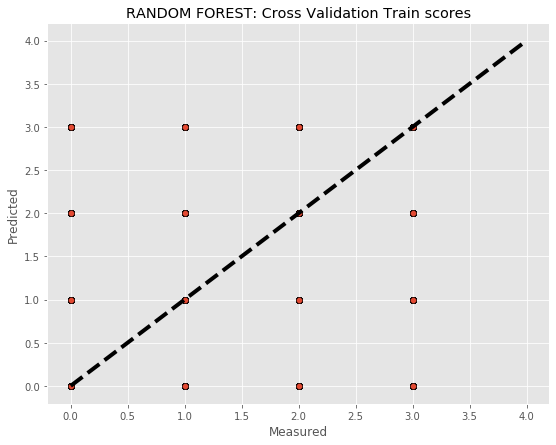

In [58]:
# Random Forest Bagging Cross Validation Train scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_train, y_rf_pred_train, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('RANDOM FOREST: Cross Validation Train scores')
plt.show()

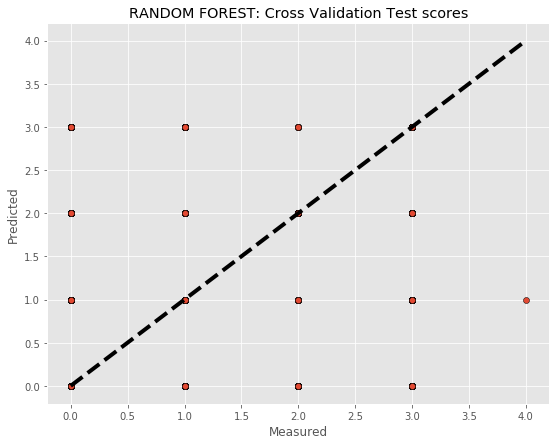

In [59]:
# Random Forest Bagging Cross Validation Test scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_test, y_rf_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('RANDOM FOREST: Cross Validation Test scores')
plt.show()

##### Classification Report

In [60]:
# classification Report for Train
from sklearn.metrics import classification_report,confusion_matrix
# y_rf_pred_train = rf_random_best.predict(X_train)
print(classification_report(y_train, y_rf_pred_train))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      9099
           1       0.97      0.96      0.97      6524
           2       0.96      0.97      0.97      5558
           3       0.97      0.95      0.96      6569

    accuracy                           0.96     27750
   macro avg       0.96      0.96      0.96     27750
weighted avg       0.96      0.96      0.96     27750



In [61]:
# classification Report for Test
from sklearn.metrics import classification_report,confusion_matrix
# y_rf_pred_test = rf_random_best.predict(X_test)
print(classification_report(y_test, y_rf_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3879
           1       0.97      0.96      0.96      2742
           2       0.96      0.97      0.97      2377
           3       0.97      0.95      0.96      2895
           4       0.00      0.00      0.00         1

    accuracy                           0.96     11894
   macro avg       0.77      0.77      0.77     11894
weighted avg       0.96      0.96      0.96     11894



##### Confusion Matrix

In [62]:
# confusion matrix for Train
print(confusion_matrix(y_train,y_rf_pred_train))

[[8815   88  102   94]
 [ 130 6280   53   61]
 [  90   24 5413   31]
 [ 197   88   65 6219]]


In [63]:
# confusion matrix for Test
print(confusion_matrix(y_test,y_rf_pred_test))

[[3737   41   47   54    0]
 [  55 2637   20   30    0]
 [  44   15 2309    9    0]
 [  85   37   30 2743    0]
 [   0    1    0    0    0]]


##### Cohen Kappa score

In [64]:
# Cohen's Kappa coefficient for Train
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_train, y_rf_pred_train)

0.9502311835659626

In [65]:
# Cohen's Kappa coefficient for Test
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_rf_pred_test)

0.9469058339216028

# Feature Selection

## Feature Importance

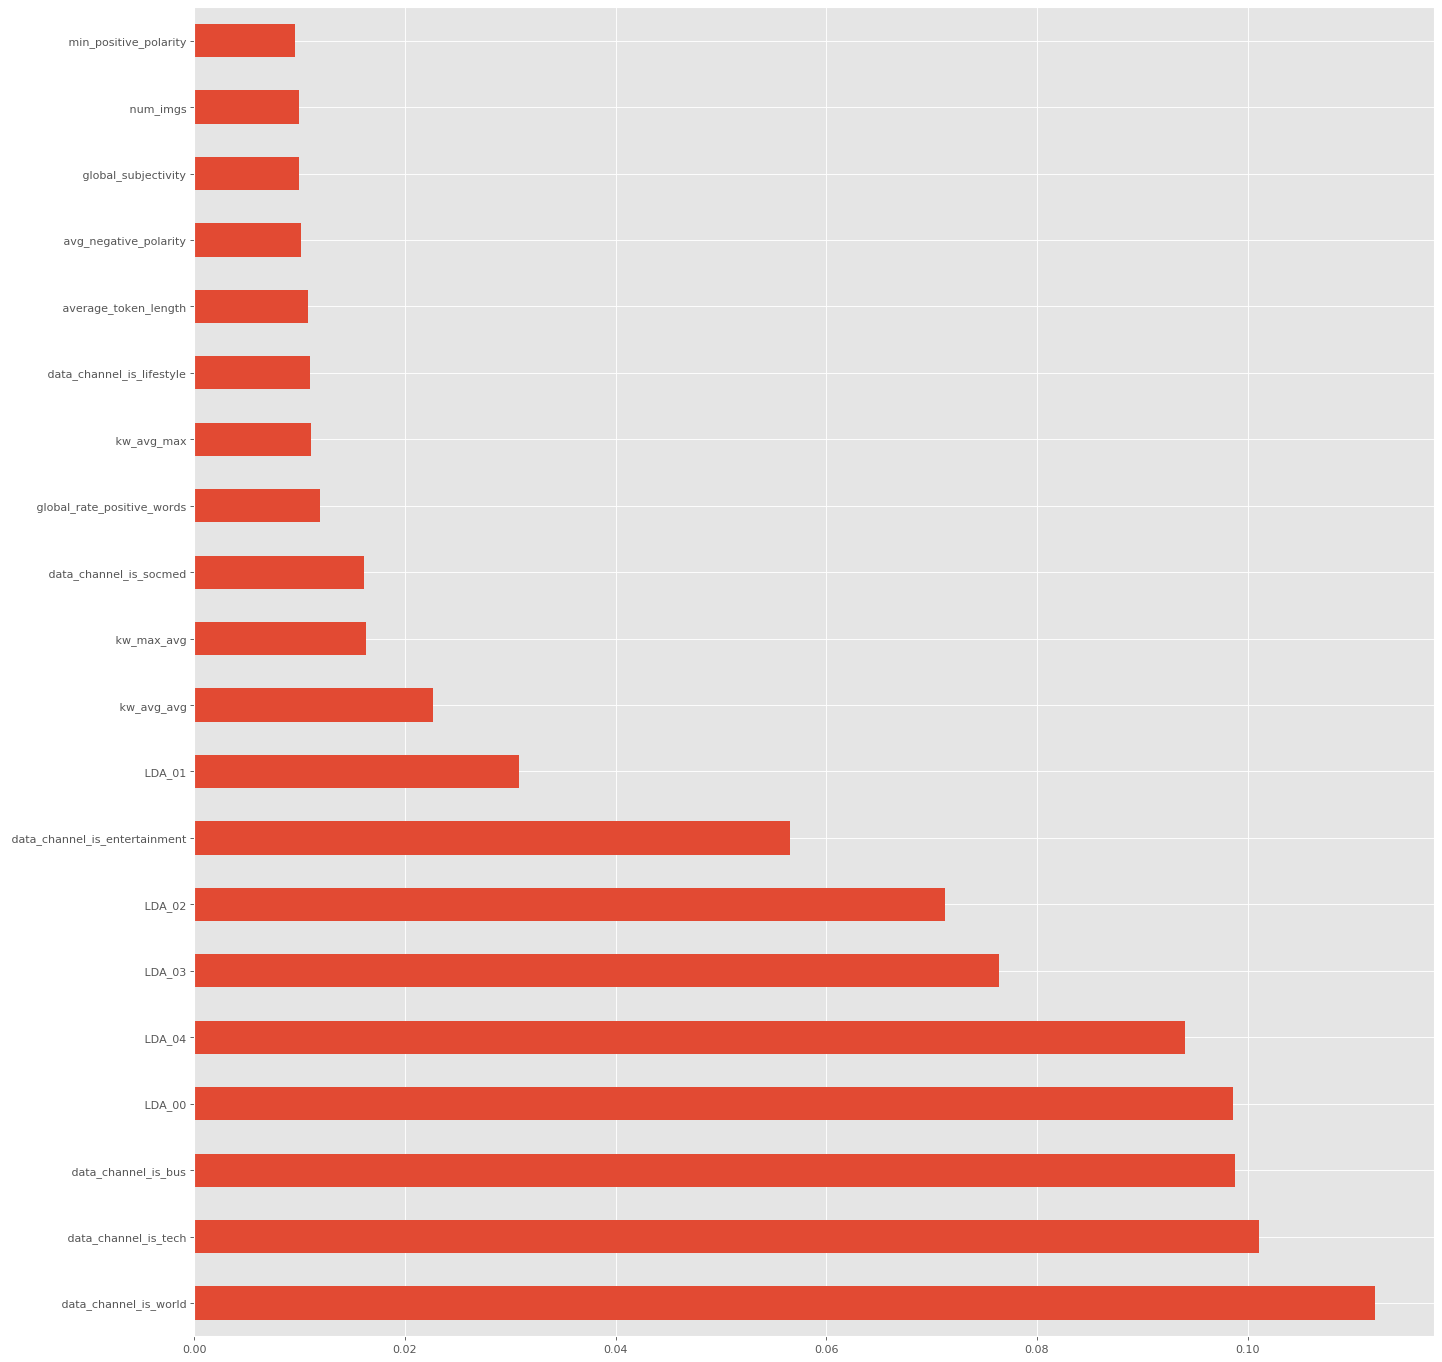

In [66]:
plt.figure(num=None, figsize=(20, 22), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(rf_random_best.feature_importances_, index= X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [67]:
feat_importances.nlargest(20).index

Index([' data_channel_is_world', ' data_channel_is_tech',
       ' data_channel_is_bus', ' LDA_00', ' LDA_04', ' LDA_03', ' LDA_02',
       ' data_channel_is_entertainment', ' LDA_01', ' kw_avg_avg',
       ' kw_max_avg', ' data_channel_is_socmed', ' global_rate_positive_words',
       ' kw_avg_max', ' data_channel_is_lifestyle', ' average_token_length',
       ' avg_negative_polarity', ' global_subjectivity', ' num_imgs',
       ' min_positive_polarity'],
      dtype='object')

In [68]:
X_Reduced = X[[' data_channel_is_world', ' data_channel_is_tech',' data_channel_is_bus', ' LDA_00', ' LDA_04', ' LDA_03', ' LDA_02', ' data_channel_is_entertainment', ' LDA_01', ' kw_avg_avg',
       ' kw_max_avg', ' data_channel_is_socmed', ' global_rate_positive_words',' kw_avg_max', ' data_channel_is_lifestyle', ' average_token_length',' avg_negative_polarity']]
    # ' global_subjectivity', ' num_imgs',' min_positive_polarity', 
      # ' rate_positive_words', ' n_unique_tokens',' global_sentiment_polarity', ' rate_negative_words',' max_positive_polarity', ' n_tokens_content', ' avg_positive_polarity', ' n_non_stop_unique_tokens', ' kw_min_avg', ' num_videos']]
       #' global_rate_negative_words', ' self_reference_avg_sharess',' timedelta', ' min_negative_polarity', ' num_hrefs', ' kw_min_min',' self_reference_min_shares', ' num_keywords', ' num_self_hrefs',' shares']]

In [69]:
# 17 selected X variables

In [70]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_Reduced, y, test_size=0.3, random_state=0)

### Random Forest

In [71]:
rf = RandomForestClassifier(random_state=0)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


#### Random Search Cross Validation

In [72]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators = range(1,50)

# splitting criterion
criterion = ['entropy','gini']

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2','int','float',None]

# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
max_depth = range(1,50)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20]

# Minimum number of samples required at each leaf node
min_samples_leaf = range(1,50)

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion':criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
              }

pprint(random_grid)

{'bootstrap': [True, False],
 'criterion': ['entropy', 'gini'],
 'max_depth': range(1, 50),
 'max_features': ['auto', 'sqrt', 'log2', 'int', 'float', None],
 'min_samples_leaf': range(1, 50),
 'min_samples_split': [2, 5, 10, 15, 20],
 'n_estimators': range(1, 50)}


In [73]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 0)
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 50, scoring='f1_weighted', 
                              cv = 5, verbose=2, random_state=0, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train2, y_train2);

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.3min finished


In [74]:
rf_random.best_params_

{'n_estimators': 32,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 40,
 'criterion': 'gini',
 'bootstrap': False}

In [75]:
# cv results
cv_results_rf = pd.DataFrame(rf_random.cv_results_)
cv_results_rf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.040092,0.006949,0.000000,0.00000,19,20,26,int,18,entropy,False,"{'n_estimators': 19, 'min_samples_split': 20, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.692564,1.372140,0.033312,0.01026,7,15,30,None,32,gini,False,"{'n_estimators': 7, 'min_samples_split': 15, '...",0.944512,0.942879,0.95154,0.941606,0.944671,0.945042,0.003439,24,0.951661,0.951699,0.949715,0.951431,0.950899,0.951081,0.00074
2,0.073004,0.004343,0.000000,0.00000,49,15,32,int,21,entropy,True,"{'n_estimators': 49, 'min_samples_split': 15, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.030318,0.007818,0.000000,0.00000,11,5,26,float,31,entropy,True,"{'n_estimators': 11, 'min_samples_split': 5, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.039095,0.009278,0.000000,0.00000,9,20,31,int,23,gini,True,"{'n_estimators': 9, 'min_samples_split': 20, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", rf_random.best_score_)
rf_random_best = rf_random.best_estimator_
print(rf_random_best)

best accuracy 0.9595904128319346
RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=32,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


#### Running the model with best parameters obtained from Random Search CV

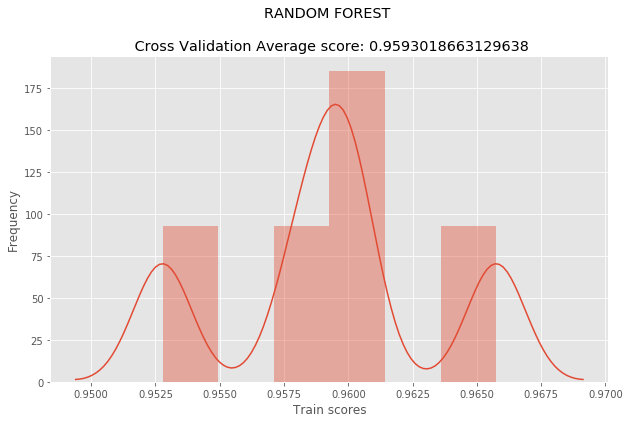

In [77]:
# K-fold cross val
kfold = KFold(shuffle=True, n_splits=5, random_state=0)
cv_results_rf = cross_val_score(rf_random_best, X_train2, y_train2, cv=kfold, scoring='f1_weighted')
plt.figure(figsize=(10,6))
plt.xlabel('Train scores')
plt.ylabel('Frequency')
sns.distplot(cv_results_rf)
plt.title('RANDOM FOREST \n\n Cross Validation Average score: {}'.format(np.mean(cv_results_rf)))
plt.show()

#### Evaluation Metrics

##### Plotting Cross Val score results

In [78]:
from sklearn.model_selection import cross_val_predict

y_rf_pred_train = cross_val_predict(rf_random_best, X_train2, y_train2, cv=5)
y_rf_pred_test = cross_val_predict(rf_random_best, X_test2, y_test2, cv=5)

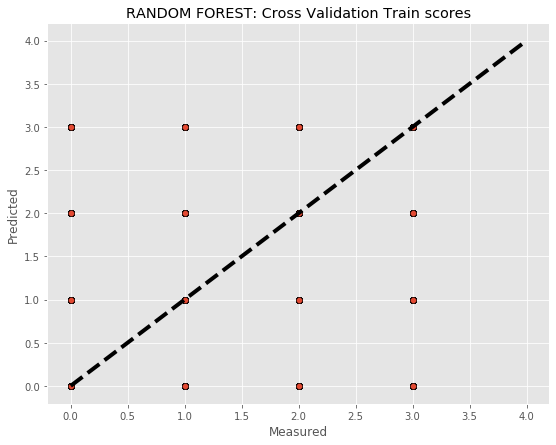

In [79]:
# Random Forest Bagging Cross Validation Train scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_train2, y_rf_pred_train, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('RANDOM FOREST: Cross Validation Train scores')
plt.show()

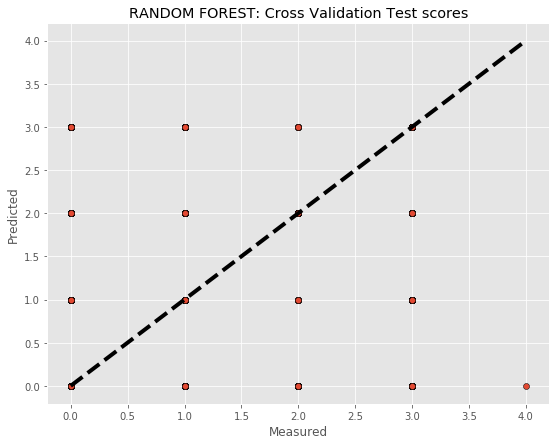

In [80]:
# Random Forest Bagging Cross Validation Test scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_test2, y_rf_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('RANDOM FOREST: Cross Validation Test scores')
plt.show()

##### Classification Report

In [81]:
# classification Report for Train
from sklearn.metrics import classification_report,confusion_matrix
# y_rf_pred_train = rf_random_best.predict(X_train)
print(classification_report(y_train2, y_rf_pred_train))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      9099
           1       0.96      0.95      0.96      6524
           2       0.96      0.97      0.97      5558
           3       0.97      0.95      0.96      6569

    accuracy                           0.96     27750
   macro avg       0.96      0.96      0.96     27750
weighted avg       0.96      0.96      0.96     27750



In [82]:
# classification Report for Test
from sklearn.metrics import classification_report,confusion_matrix
# y_rf_pred_test = rf_random_best.predict(X_test)
print(classification_report(y_test2, y_rf_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3879
           1       0.96      0.95      0.96      2742
           2       0.96      0.97      0.96      2377
           3       0.97      0.94      0.95      2895
           4       0.00      0.00      0.00         1

    accuracy                           0.96     11894
   macro avg       0.77      0.77      0.77     11894
weighted avg       0.96      0.96      0.96     11894



##### Confusion Matrix

In [83]:
# confusion matrix for Train
print(confusion_matrix(y_train2,y_rf_pred_train))

[[8770  102  116  111]
 [ 152 6229   66   77]
 [ 104   26 5404   24]
 [ 175  114   54 6226]]


In [84]:
# confusion matrix for Test
print(confusion_matrix(y_test2,y_rf_pred_test))

[[3734   45   54   46    0]
 [  59 2614   27   42    0]
 [  54   13 2300   10    0]
 [  90   49   25 2731    0]
 [   1    0    0    0    0]]


##### Cohen Kappa score

In [85]:
# Cohen's Kappa coefficient for Train
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_train2, y_rf_pred_train)

0.9454716317995108

In [86]:
# Cohen's Kappa coefficient for Test
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test2, y_rf_pred_test)

0.9415635507273372

## Wrapper Method

### RFE

In [87]:
y = df_scaled_2['Clus_km']
X = df_scaled_2.drop(['Clus_km'], axis=1)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [89]:
from sklearn.feature_selection import RFE

#rank all features, i.e continue the elimination until the last one
rfe = RFE(rf_random_best)
rfe.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=40, max_features='log2',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=2, min_samples_split=10,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=32, n_jobs=None,
                                     oob_score=False, random_state=0, verbose=0,
                                     warm_start=False),
    n_features_to_select=None, step=1, verbose=0)

In [90]:
print("Overall Accuracy using RFE: ", rfe.score(X_test,y_test))

Overall Accuracy using RFE:  0.9643517740036993


In [91]:
print("Number of Features: ", rfe.n_features_)

Number of Features:  30


In [92]:
rfe.support_

array([ True, False,  True,  True, False,  True, False, False,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False,  True, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False])

In [93]:
rfe.ranking_

array([ 1, 19,  1,  1, 21,  1,  8,  5,  1,  7,  1, 12,  1,  1,  1,  1,  1,
        1, 18, 15,  9, 16, 11,  1,  4,  1,  1, 14,  6,  2, 26, 25, 29, 30,
       28, 27, 31, 24,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  3, 13, 20, 17, 23, 22, 10])

In [94]:
print("Selected Features: ")
colcheck = pd.Series(rfe.support_, index = list(X.columns))
colcheck[colcheck == True].index

Selected Features: 


Index([' timedelta', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_unique_tokens', ' num_imgs', ' average_token_length',
       ' data_channel_is_lifestyle', ' data_channel_is_entertainment',
       ' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world', ' kw_avg_max',
       ' kw_max_avg', ' kw_avg_avg', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity'],
      dtype='object')

In [95]:
print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), X.columns)))

Features sorted by their rank:
[(1, ' LDA_00'), (1, ' LDA_01'), (1, ' LDA_02'), (1, ' LDA_03'), (1, ' LDA_04'), (1, ' average_token_length'), (1, ' avg_negative_polarity'), (1, ' avg_positive_polarity'), (1, ' data_channel_is_bus'), (1, ' data_channel_is_entertainment'), (1, ' data_channel_is_lifestyle'), (1, ' data_channel_is_socmed'), (1, ' data_channel_is_tech'), (1, ' data_channel_is_world'), (1, ' global_rate_negative_words'), (1, ' global_rate_positive_words'), (1, ' global_sentiment_polarity'), (1, ' global_subjectivity'), (1, ' kw_avg_avg'), (1, ' kw_avg_max'), (1, ' kw_max_avg'), (1, ' max_positive_polarity'), (1, ' min_positive_polarity'), (1, ' n_non_stop_unique_tokens'), (1, ' n_tokens_content'), (1, ' n_unique_tokens'), (1, ' num_imgs'), (1, ' rate_negative_words'), (1, ' rate_positive_words'), (1, ' timedelta'), (2, ' self_reference_avg_sharess'), (3, ' min_negative_polarity'), (4, ' kw_min_avg'), (5, ' num_self_hrefs'), (6, ' self_reference_max_shares'), (7, ' num_videos

In [96]:
# 30 Selected X features

### RFE CV

In [97]:
y = df_scaled_2['Clus_km']
X = df_scaled_2.drop(['Clus_km'], axis=1)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [99]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [100]:
rfc = rf_random_best
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(5), scoring='f1_weighted', n_jobs=-1)
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=40, max_features='log2',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=2, min_samples_split=10,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=32, n_jobs=None,
                                       oob_score=False, random_state=0,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=-1, scoring='f1_weighted', step=1,
      verbose=0)

In [101]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 13


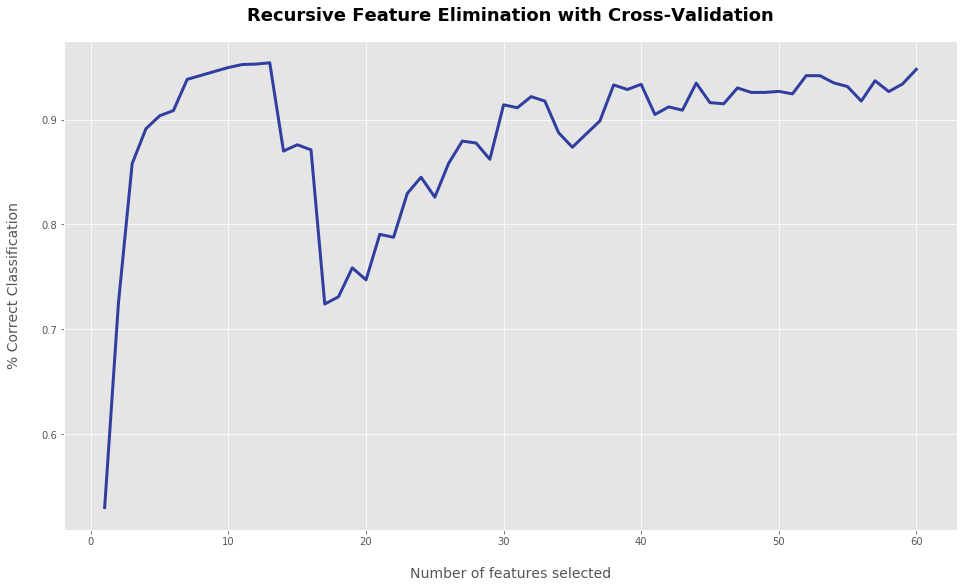

In [102]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [103]:
print(np.where(rfecv.support_ == False)[0])

X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 15 18 19 20 21 22 23 24 25 27 28
 29 30 31 32 33 34 35 36 37 43 45 46 47 48 50 52 53 54 55 56 57 58 59]


In [104]:
rfecv.estimator.feature_importances_

array([0.13958484, 0.110167  , 0.09011431, 0.12783886, 0.13236845,
       0.07277766, 0.07410978, 0.05450397, 0.02672011, 0.02360133,
       0.01826024, 0.01455761, 0.03330852, 0.01347771, 0.01598496,
       0.02949985, 0.02312483])

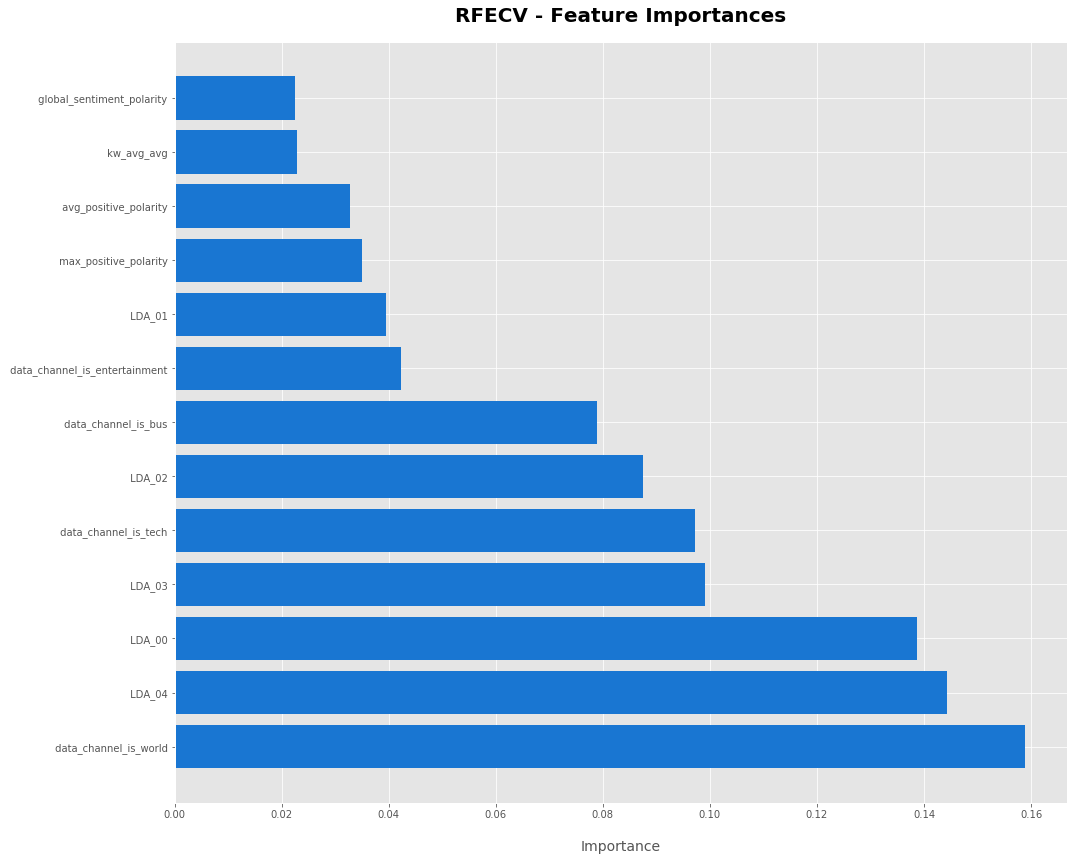

In [105]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [106]:
# Selected 13 X features

#### Random Forest

In [107]:
rf = RandomForestClassifier(random_state=0)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


#### Random Search Cross Validation

In [108]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators = range(1,50)

# splitting criterion
criterion = ['entropy','gini']

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2','int','float',None]

# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
max_depth = range(1,50)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20]

# Minimum number of samples required at each leaf node
min_samples_leaf = range(1,50)

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion':criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
              }

pprint(random_grid)

{'bootstrap': [True, False],
 'criterion': ['entropy', 'gini'],
 'max_depth': range(1, 50),
 'max_features': ['auto', 'sqrt', 'log2', 'int', 'float', None],
 'min_samples_leaf': range(1, 50),
 'min_samples_split': [2, 5, 10, 15, 20],
 'n_estimators': range(1, 50)}


In [109]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 0)
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 50, scoring='f1_weighted', 
                              cv = 5, verbose=2, random_state=0, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train2, y_train2);

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.6min finished


In [110]:
rf_random.best_params_

{'n_estimators': 32,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 40,
 'criterion': 'gini',
 'bootstrap': False}

In [111]:
# cv results
cv_results_rf = pd.DataFrame(rf_random.cv_results_)
cv_results_rf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.096142,0.024879,0.000000,0.00000,19,20,26,int,18,entropy,False,"{'n_estimators': 19, 'min_samples_split': 20, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9.406025,1.728655,0.027526,0.00162,7,15,30,None,32,gini,False,"{'n_estimators': 7, 'min_samples_split': 15, '...",0.944512,0.942879,0.95154,0.941606,0.944671,0.945042,0.003439,24,0.951661,0.951699,0.949715,0.951431,0.950899,0.951081,0.00074
2,0.210436,0.019482,0.000000,0.00000,49,15,32,int,21,entropy,True,"{'n_estimators': 49, 'min_samples_split': 15, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.085970,0.008863,0.000000,0.00000,11,5,26,float,31,entropy,True,"{'n_estimators': 11, 'min_samples_split': 5, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.076395,0.007426,0.000000,0.00000,9,20,31,int,23,gini,True,"{'n_estimators': 9, 'min_samples_split': 20, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", rf_random.best_score_)
rf_random_best = rf_random.best_estimator_
print(rf_random_best)

best accuracy 0.9595904128319346
RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=32,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


#### Running the model with best parameters obtained from Random Search CV

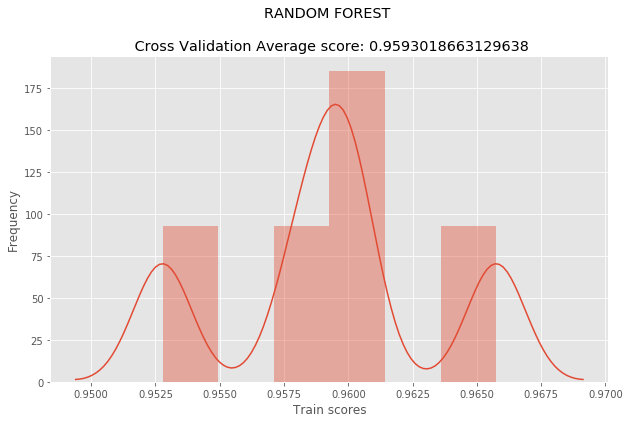

In [113]:
# K-fold cross val
kfold = KFold(shuffle=True, n_splits=5, random_state=0)
cv_results_rf = cross_val_score(rf_random_best, X_train2, y_train2, cv=kfold, scoring='f1_weighted')
plt.figure(figsize=(10,6))
plt.xlabel('Train scores')
plt.ylabel('Frequency')
sns.distplot(cv_results_rf)
plt.title('RANDOM FOREST \n\n Cross Validation Average score: {}'.format(np.mean(cv_results_rf)))
plt.show()

#### Evaluation Metrics

##### Plotting Cross Val score results

In [114]:
from sklearn.model_selection import cross_val_predict

y_rf_pred_train = cross_val_predict(rf_random_best, X_train2, y_train2, cv=5)
y_rf_pred_test = cross_val_predict(rf_random_best, X_test2, y_test2, cv=5)

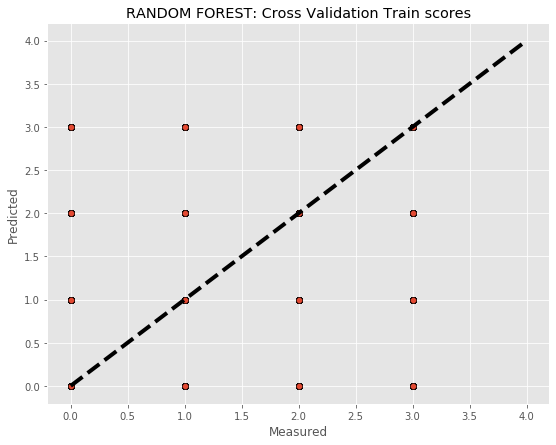

In [115]:
# Random Forest Bagging Cross Validation Train scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_train2, y_rf_pred_train, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('RANDOM FOREST: Cross Validation Train scores')
plt.show()

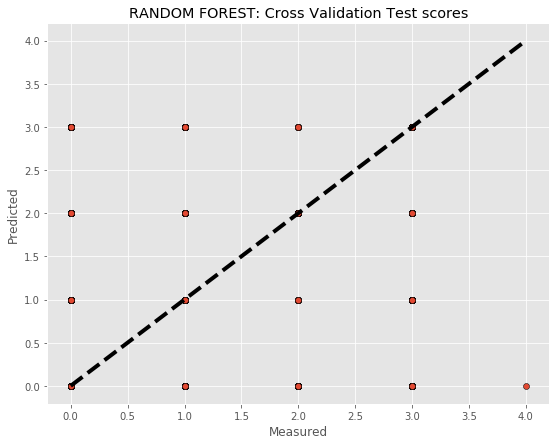

In [116]:
# Random Forest Bagging Cross Validation Test scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_test2, y_rf_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('RANDOM FOREST: Cross Validation Test scores')
plt.show()

##### Classification Report

In [117]:
# classification Report for Train
from sklearn.metrics import classification_report,confusion_matrix
# y_rf_pred_train = rf_random_best.predict(X_train)
print(classification_report(y_train2, y_rf_pred_train))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      9099
           1       0.96      0.95      0.96      6524
           2       0.96      0.97      0.97      5558
           3       0.97      0.95      0.96      6569

    accuracy                           0.96     27750
   macro avg       0.96      0.96      0.96     27750
weighted avg       0.96      0.96      0.96     27750



In [118]:
# classification Report for Test
from sklearn.metrics import classification_report,confusion_matrix
# y_rf_pred_test = rf_random_best.predict(X_test)
print(classification_report(y_test2, y_rf_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3879
           1       0.96      0.95      0.96      2742
           2       0.96      0.97      0.96      2377
           3       0.97      0.94      0.95      2895
           4       0.00      0.00      0.00         1

    accuracy                           0.96     11894
   macro avg       0.77      0.77      0.77     11894
weighted avg       0.96      0.96      0.96     11894



##### Confusion Matrix

In [119]:
# confusion matrix for Train
print(confusion_matrix(y_train2,y_rf_pred_train))

[[8770  102  116  111]
 [ 152 6229   66   77]
 [ 104   26 5404   24]
 [ 175  114   54 6226]]


In [120]:
# confusion matrix for Test
print(confusion_matrix(y_test2,y_rf_pred_test))

[[3734   45   54   46    0]
 [  59 2614   27   42    0]
 [  54   13 2300   10    0]
 [  90   49   25 2731    0]
 [   1    0    0    0    0]]


##### Cohen Kappa score

In [121]:
# Cohen's Kappa coefficient for Train
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_train2, y_rf_pred_train)

0.9454716317995108

In [122]:
# Cohen's Kappa coefficient for Test
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test2, y_rf_pred_test)

0.9415635507273372

## Univariate Feature Selection (Filter Method)

### Correlation Matrix Analysis

In [123]:
y = df_scaled_2['Clus_km']
X = df_scaled_2.drop(['Clus_km'], axis=1)

In [124]:
Numeric_df = pd.DataFrame(X)
Numeric_df['y'] = y
corr= Numeric_df.corr(method='spearman')
corr_y = abs(corr["y"])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

 data_channel_is_entertainment    0.516553
 LDA_03                           0.534248
 LDA_04                           0.618619
 data_channel_is_tech             0.631943
y                                 1.000000
Name: y, dtype: float64

In [125]:
# we see much better correlation as with the target "cluster" as compared to the target "shares"
# However just 4 features is not enough to describe the target column

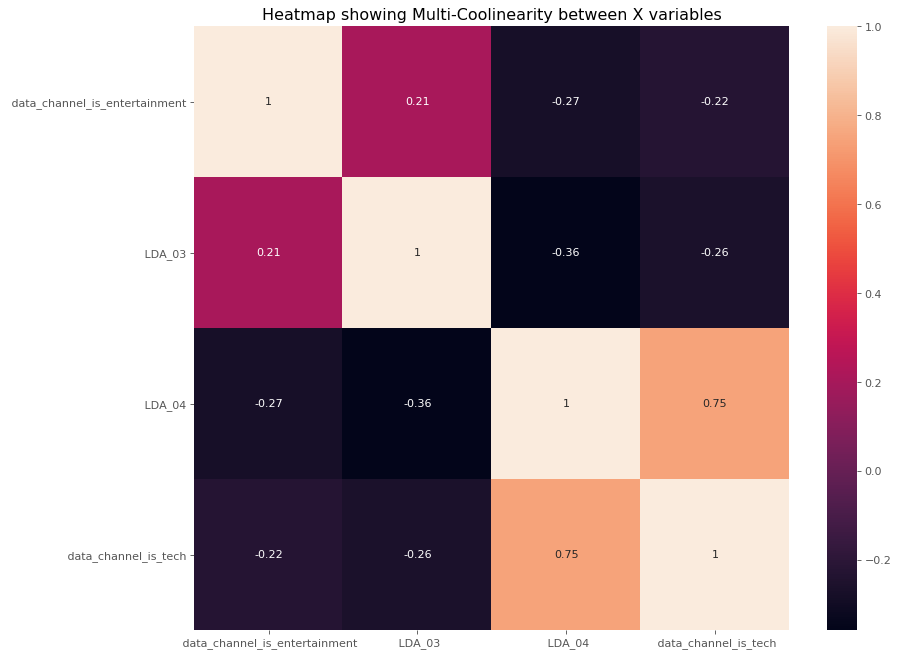

In [126]:
# Checking if all the X variables are correlated with each other (Multi-Coolinearity)

plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

corr2 = Numeric_df[[' data_channel_is_entertainment' , ' LDA_03' , ' LDA_04' , ' data_channel_is_tech']].corr()

sns.heatmap(corr2, annot=True, fmt=".2g")

plt.title("Heatmap showing Multi-Coolinearity between X variables")

plt.show()

In [127]:
# However, multi-coolinearity seems to be weak among X
# There seems to be a relation between LDA_04 AND data_channel_is_tech, hence we would have to drop data_channel_is_tech.
# Hence, no need to drop X columns

In [128]:
y = df_scaled_2['Clus_km']
X = df_scaled_2.drop(['Clus_km'], axis=1)

In [129]:
X_selected = df_scaled_2[[' data_channel_is_entertainment' , ' LDA_03' , ' LDA_04']]
X_selected.head()

,data_channel_is_entertainment,LDA_03,LDA_04
0,2.148880,-0.618276,-0.670541
1,-0.465359,-0.588335,-0.636381
2,-0.465359,-0.645137,1.549759
3,2.148880,-0.660140,-0.710484
4,-0.465359,-0.661269,2.252569


In [130]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_selected, y, test_size=0.3, random_state=0)

#### Random Forest

In [131]:
rf = RandomForestClassifier(random_state=0)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


#### Random Search Cross Validation

In [132]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators = range(1,50)

# splitting criterion
criterion = ['entropy','gini']

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2','int','float',None]

# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
max_depth = range(1,50)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20]

# Minimum number of samples required at each leaf node
min_samples_leaf = range(1,50)

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion':criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
              }

pprint(random_grid)

{'bootstrap': [True, False],
 'criterion': ['entropy', 'gini'],
 'max_depth': range(1, 50),
 'max_features': ['auto', 'sqrt', 'log2', 'int', 'float', None],
 'min_samples_leaf': range(1, 50),
 'min_samples_split': [2, 5, 10, 15, 20],
 'n_estimators': range(1, 50)}


In [133]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 0)
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 50, scoring='f1_weighted', 
                              cv = 5, verbose=2, random_state=0, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train2, y_train2);

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   44.5s finished


In [134]:
rf_random.best_params_

{'n_estimators': 23,
 'min_samples_split': 15,
 'min_samples_leaf': 8,
 'max_features': 'sqrt',
 'max_depth': 35,
 'criterion': 'entropy',
 'bootstrap': False}

In [135]:
# cv results
cv_results_rf = pd.DataFrame(rf_random.cv_results_)
cv_results_rf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.028523,0.003191,0.000000,0.000000,19,20,26,int,18,entropy,False,"{'n_estimators': 19, 'min_samples_split': 20, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.686163,0.194738,0.023338,0.012402,7,15,30,None,32,gini,False,"{'n_estimators': 7, 'min_samples_split': 15, '...",0.760699,0.761591,0.758697,0.759556,0.761951,0.760499,0.001223,20,0.788721,0.787498,0.788163,0.789912,0.79133,0.789125,0.001358
2,0.065425,0.014516,0.000000,0.000000,49,15,32,int,21,entropy,True,"{'n_estimators': 49, 'min_samples_split': 15, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.039095,0.018012,0.000000,0.000000,11,5,26,float,31,entropy,True,"{'n_estimators': 11, 'min_samples_split': 5, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.033311,0.018950,0.000000,0.000000,9,20,31,int,23,gini,True,"{'n_estimators': 9, 'min_samples_split': 20, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", rf_random.best_score_)
rf_random_best = rf_random.best_estimator_
print(rf_random_best)

best accuracy 0.7840287943339829
RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=35, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=23,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


#### Running the model with best parameters obtained from Random Search CV

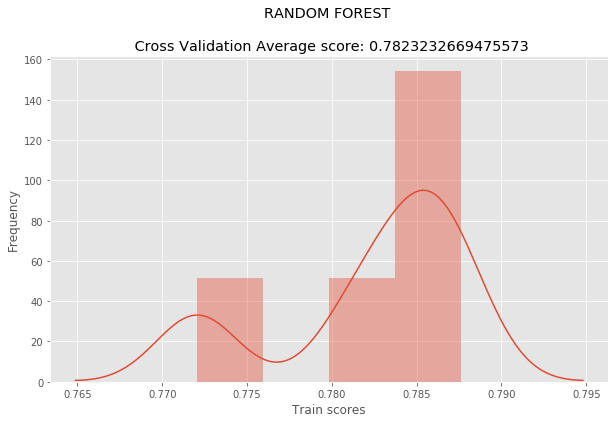

In [137]:
# K-fold cross val
kfold = KFold(shuffle=True, n_splits=5, random_state=0)
cv_results_rf = cross_val_score(rf_random_best, X_train2, y_train2, cv=kfold, scoring='f1_weighted')
plt.figure(figsize=(10,6))
plt.xlabel('Train scores')
plt.ylabel('Frequency')
sns.distplot(cv_results_rf)
plt.title('RANDOM FOREST \n\n Cross Validation Average score: {}'.format(np.mean(cv_results_rf)))
plt.show()

#### Evaluation Metrics

##### Plotting Cross Val score results

In [138]:
from sklearn.model_selection import cross_val_predict

y_rf_pred_train = cross_val_predict(rf_random_best, X_train2, y_train2, cv=5)
y_rf_pred_test = cross_val_predict(rf_random_best, X_test2, y_test2, cv=5)

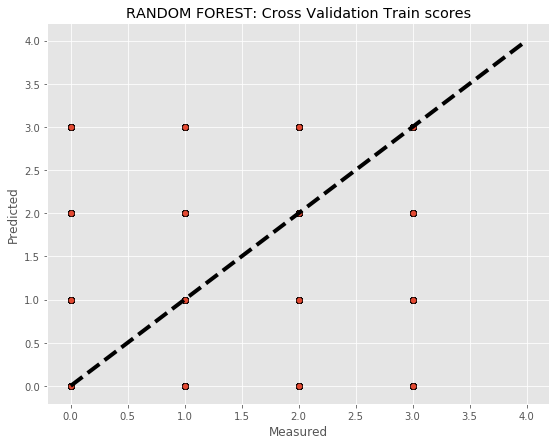

In [139]:
# Random Forest Bagging Cross Validation Train scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_train2, y_rf_pred_train, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('RANDOM FOREST: Cross Validation Train scores')
plt.show()

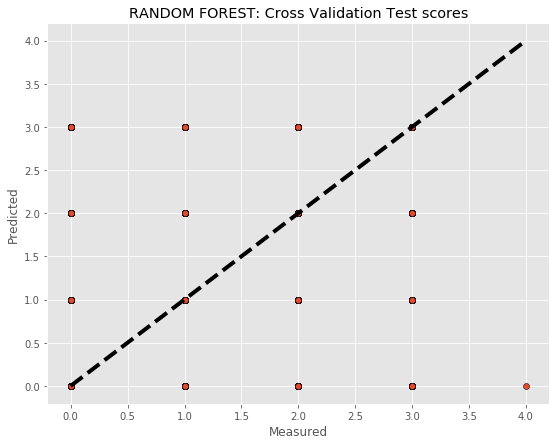

In [140]:
# Random Forest Bagging Cross Validation Test scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_test2, y_rf_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('RANDOM FOREST: Cross Validation Test scores')
plt.show()

##### Classification Report

In [141]:
# classification Report for Train
from sklearn.metrics import classification_report,confusion_matrix
# y_rf_pred_train = rf_random_best.predict(X_train)
print(classification_report(y_train2, y_rf_pred_train))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      9099
           1       0.70      0.61      0.65      6524
           2       0.72      0.67      0.70      5558
           3       0.83      0.86      0.84      6569

    accuracy                           0.79     27750
   macro avg       0.77      0.77      0.77     27750
weighted avg       0.78      0.79      0.78     27750



In [142]:
# classification Report for Test
from sklearn.metrics import classification_report,confusion_matrix
# y_rf_pred_test = rf_random_best.predict(X_test)
print(classification_report(y_test2, y_rf_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      3879
           1       0.68      0.60      0.64      2742
           2       0.70      0.64      0.67      2377
           3       0.82      0.88      0.85      2895
           4       0.00      0.00      0.00         1

    accuracy                           0.78     11894
   macro avg       0.61      0.61      0.61     11894
weighted avg       0.78      0.78      0.78     11894



##### Confusion Matrix

In [143]:
# confusion matrix for Train
print(confusion_matrix(y_train2,y_rf_pred_train))

[[8481  219  211  188]
 [ 933 3992 1004  595]
 [ 255 1151 3736  416]
 [ 328  355  211 5675]]


In [144]:
# confusion matrix for Test
print(confusion_matrix(y_test2,y_rf_pred_test))

[[3595   95   97   92    0]
 [ 362 1643  469  268    0]
 [ 114  542 1531  190    0]
 [ 126  129   94 2546    0]
 [   1    0    0    0    0]]


##### Cohen Kappa score

In [145]:
# Cohen's Kappa coefficient for Train
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_train2, y_rf_pred_train)

0.7133908452727726

In [146]:
# Cohen's Kappa coefficient for Test
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test2, y_rf_pred_test)

0.7062008486823591

### SelectKBest: chi2

In [147]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [148]:
df3 = df2
df3.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [149]:
df3["Clus_km"] = labels
df3.head(5)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Clus_km
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,2
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,3
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,3


In [150]:
y = df3['Clus_km']
X = df3.drop(['Clus_km'], axis=1)

In [151]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
scaled_X = min_max_scaler.fit_transform(X)

In [152]:
scaled_X

array([[1.00000000e+00, 4.76190476e-01, 2.58437574e-02, ...,
        0.00000000e+00, 1.87500000e-01, 7.02004864e-04],
       [1.00000000e+00, 3.33333333e-01, 3.00920463e-02, ...,
        1.00000000e+00, 0.00000000e+00, 8.41931509e-04],
       [1.00000000e+00, 3.33333333e-01, 2.48996932e-02, ...,
        1.00000000e+00, 0.00000000e+00, 1.77754272e-03],
       ...,
       [0.00000000e+00, 3.80952381e-01, 5.21595468e-02, ...,
        9.09090909e-02, 1.36363636e-01, 2.25187033e-03],
       [0.00000000e+00, 1.90476190e-01, 8.04814727e-02, ...,
        1.00000000e+00, 0.00000000e+00, 1.30321511e-03],
       [0.00000000e+00, 3.80952381e-01, 1.85272599e-02, ...,
        3.33333333e-01, 2.50000000e-01, 1.54037892e-03]])

In [153]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [154]:
sel_chi2 = SelectKBest(chi2, k=17)    # select 17 features
X_chi2 = sel_chi2.fit_transform(scaled_X, y)
print(sel_chi2.get_support())

[ True False False  True  True  True False False False  True False False
  True  True  True  True  True  True False False False False False False
 False False False False False False False False False False False False
 False False  True  True  True  True  True False False False False  True
 False False False False False False False False False False False False]


In [155]:
print("Selected Features: ")
colcheck = pd.Series(sel_chi2.get_support(), index = list(X.columns))
colcheck[colcheck == True].index

Selected Features: 


Index([' timedelta', ' n_unique_tokens', ' n_non_stop_words',
       ' n_non_stop_unique_tokens', ' num_videos',
       ' data_channel_is_lifestyle', ' data_channel_is_entertainment',
       ' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world', ' LDA_00', ' LDA_01',
       ' LDA_02', ' LDA_03', ' LDA_04', ' rate_positive_words'],
      dtype='object')

In [156]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_chi2, y, test_size=0.3, random_state=0)

#### Random Forest

In [157]:
rf = RandomForestClassifier(random_state=0)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


#### Random Search Cross Validation

In [158]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators = range(1,50)

# splitting criterion
criterion = ['entropy','gini']

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2','int','float',None]

# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
max_depth = range(1,50)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20]

# Minimum number of samples required at each leaf node
min_samples_leaf = range(1,50)

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion':criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
              }

pprint(random_grid)

{'bootstrap': [True, False],
 'criterion': ['entropy', 'gini'],
 'max_depth': range(1, 50),
 'max_features': ['auto', 'sqrt', 'log2', 'int', 'float', None],
 'min_samples_leaf': range(1, 50),
 'min_samples_split': [2, 5, 10, 15, 20],
 'n_estimators': range(1, 50)}


In [159]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 0)
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 50, scoring='f1_weighted', 
                              cv = 5, verbose=2, random_state=0, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train3, y_train3);

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:   59.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


In [160]:
rf_random.best_params_

{'n_estimators': 32,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 40,
 'criterion': 'gini',
 'bootstrap': False}

In [161]:
# cv results
cv_results_rf = pd.DataFrame(rf_random.cv_results_)
cv_results_rf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.035305,0.003191,0.000000,0.000000,19,20,26,int,18,entropy,False,"{'n_estimators': 19, 'min_samples_split': 20, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.527359,0.571442,0.012766,0.000977,7,15,30,None,32,gini,False,"{'n_estimators': 7, 'min_samples_split': 15, '...",0.942548,0.942486,0.946453,0.940716,0.943157,0.943072,0.001877,25,0.949819,0.949643,0.94876,0.950297,0.950523,0.949808,0.000613
2,0.063031,0.013326,0.000000,0.000000,49,15,32,int,21,entropy,True,"{'n_estimators': 49, 'min_samples_split': 15, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.044879,0.017694,0.000000,0.000000,11,5,26,float,31,entropy,True,"{'n_estimators': 11, 'min_samples_split': 5, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.039496,0.017097,0.000000,0.000000,9,20,31,int,23,gini,True,"{'n_estimators': 9, 'min_samples_split': 20, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", rf_random.best_score_)
rf_random_best = rf_random.best_estimator_
print(rf_random_best)

best accuracy 0.9552594190620681
RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=32,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


#### Running the model with best parameters obtained from Random Search CV

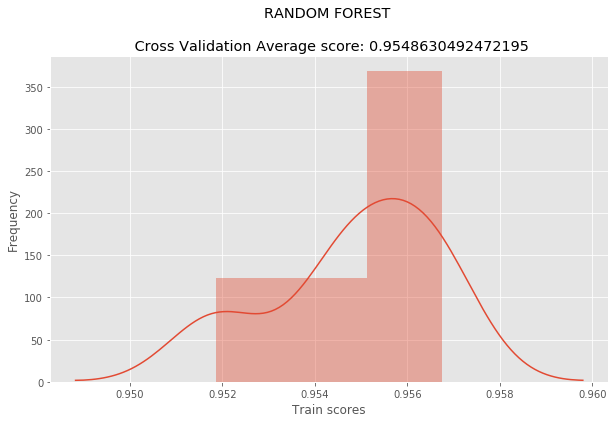

In [163]:
# K-fold cross val
kfold = KFold(shuffle=True, n_splits=5, random_state=0)
cv_results_rf = cross_val_score(rf_random_best, X_train3, y_train3, cv=kfold, scoring='f1_weighted')
plt.figure(figsize=(10,6))
plt.xlabel('Train scores')
plt.ylabel('Frequency')
sns.distplot(cv_results_rf)
plt.title('RANDOM FOREST \n\n Cross Validation Average score: {}'.format(np.mean(cv_results_rf)))
plt.show()

#### Evaluation Metrics

##### Plotting Cross Val score results

In [164]:
from sklearn.model_selection import cross_val_predict

y_rf_pred_train = cross_val_predict(rf_random_best, X_train3, y_train3, cv=5)
y_rf_pred_test = cross_val_predict(rf_random_best, X_test3, y_test3, cv=5)

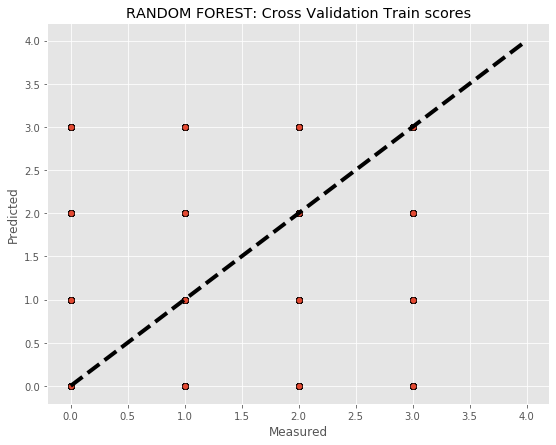

In [165]:
# Random Forest Bagging Cross Validation Train scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_train3, y_rf_pred_train, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('RANDOM FOREST: Cross Validation Train scores')
plt.show()

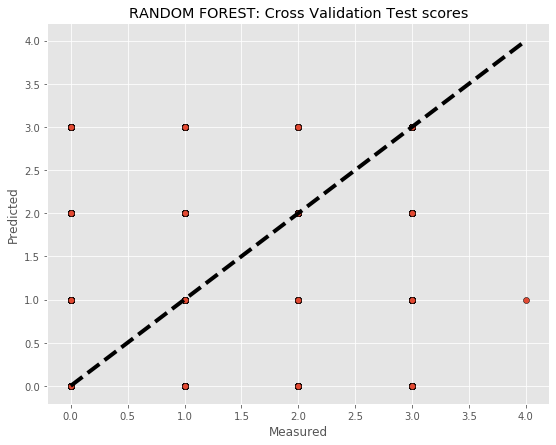

In [166]:
# Random Forest Bagging Cross Validation Test scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_test3, y_rf_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('RANDOM FOREST: Cross Validation Test scores')
plt.show()

##### Classification Report

In [167]:
# classification Report for Train
from sklearn.metrics import classification_report,confusion_matrix
# y_rf_pred_train = rf_random_best.predict(X_train)
print(classification_report(y_train3, y_rf_pred_train))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      9099
           1       0.96      0.95      0.96      6524
           2       0.95      0.97      0.96      5558
           3       0.96      0.94      0.95      6569

    accuracy                           0.96     27750
   macro avg       0.96      0.96      0.96     27750
weighted avg       0.96      0.96      0.96     27750



In [168]:
# classification Report for Test
from sklearn.metrics import classification_report,confusion_matrix
# y_rf_pred_test = rf_random_best.predict(X_test)
print(classification_report(y_test3, y_rf_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3879
           1       0.96      0.95      0.95      2742
           2       0.95      0.97      0.96      2377
           3       0.96      0.94      0.95      2895
           4       0.00      0.00      0.00         1

    accuracy                           0.95     11894
   macro avg       0.76      0.76      0.76     11894
weighted avg       0.95      0.95      0.95     11894



##### Confusion Matrix

In [169]:
# confusion matrix for Train
print(confusion_matrix(y_train3,y_rf_pred_train))

[[8674  138  153  134]
 [ 167 6224   59   74]
 [  89   31 5414   24]
 [ 221   94   57 6197]]


In [170]:
# confusion matrix for Test
print(confusion_matrix(y_test3,y_rf_pred_test))

[[3689   57   68   65    0]
 [  64 2613   30   35    0]
 [  43   15 2306   13    0]
 [  89   50   31 2725    0]
 [   0    1    0    0    0]]


##### Cohen Kappa score

In [171]:
# Cohen's Kappa coefficient for Train
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_train3, y_rf_pred_train)

0.9396525746268675

In [172]:
# Cohen's Kappa coefficient for Test
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test3, y_rf_pred_test)

0.9363861434939769

### SelectKBest: mutual_info

In [173]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [174]:
df3 = df2
df3.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Clus_km
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,2
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,3
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,3


In [175]:
df3["Clus_km"] = labels
df3.head(5)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Clus_km
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,2
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,3
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,3


In [176]:
y = df3['Clus_km']
X = df3.drop(['Clus_km'], axis=1)

In [177]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
scaled_X = min_max_scaler.fit_transform(X)

In [178]:
scaled_X

array([[1.00000000e+00, 4.76190476e-01, 2.58437574e-02, ...,
        0.00000000e+00, 1.87500000e-01, 7.02004864e-04],
       [1.00000000e+00, 3.33333333e-01, 3.00920463e-02, ...,
        1.00000000e+00, 0.00000000e+00, 8.41931509e-04],
       [1.00000000e+00, 3.33333333e-01, 2.48996932e-02, ...,
        1.00000000e+00, 0.00000000e+00, 1.77754272e-03],
       ...,
       [0.00000000e+00, 3.80952381e-01, 5.21595468e-02, ...,
        9.09090909e-02, 1.36363636e-01, 2.25187033e-03],
       [0.00000000e+00, 1.90476190e-01, 8.04814727e-02, ...,
        1.00000000e+00, 0.00000000e+00, 1.30321511e-03],
       [0.00000000e+00, 3.80952381e-01, 1.85272599e-02, ...,
        3.33333333e-01, 2.50000000e-01, 1.54037892e-03]])

In [179]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [180]:
sel_mut_info = SelectKBest(mutual_info_classif, k=17)    # select 17 features
X_mut_info = sel_mut_info.fit_transform(scaled_X, y)
print(sel_mut_info.get_support())

[False False False False False False False False False False False False
 False  True  True False  True  True False  True False False False  True
 False  True  True False  True False False False False False False False
 False False  True  True  True  True  True  True  True False False  True
 False False False False False False False False False False False False]


In [181]:
print("Selected Features: ")
colcheck = pd.Series(sel_mut_info.get_support(), index = list(X.columns))
colcheck[colcheck == True].index

Selected Features: 


Index([' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_tech', ' data_channel_is_world', ' kw_max_min',
       ' kw_avg_max', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_max_shares', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' rate_positive_words'],
      dtype='object')

In [182]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_mut_info, y, test_size=0.3, random_state=0)

#### Random Forest

In [183]:
rf = RandomForestClassifier(random_state=0)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


#### Random Search Cross Validation

In [184]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators = range(1,50)

# splitting criterion
criterion = ['entropy','gini']

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2','int','float',None]

# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
max_depth = range(1,50)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20]

# Minimum number of samples required at each leaf node
min_samples_leaf = range(1,50)

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion':criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
              }

pprint(random_grid)

{'bootstrap': [True, False],
 'criterion': ['entropy', 'gini'],
 'max_depth': range(1, 50),
 'max_features': ['auto', 'sqrt', 'log2', 'int', 'float', None],
 'min_samples_leaf': range(1, 50),
 'min_samples_split': [2, 5, 10, 15, 20],
 'n_estimators': range(1, 50)}


In [185]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 0)
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 50, scoring='f1_weighted', 
                              cv = 5, verbose=2, random_state=0, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train3, y_train3);

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.4min finished


In [186]:
rf_random.best_params_

{'n_estimators': 32,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 40,
 'criterion': 'gini',
 'bootstrap': False}

In [187]:
# cv results
cv_results_rf = pd.DataFrame(rf_random.cv_results_)
cv_results_rf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.047268,0.006787,0.000000,0.000000,19,20,26,int,18,entropy,False,"{'n_estimators': 19, 'min_samples_split': 20, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.280283,0.685556,0.017551,0.004831,7,15,30,None,32,gini,False,"{'n_estimators': 7, 'min_samples_split': 15, '...",0.945252,0.941438,0.94775,0.937451,0.943238,0.943026,0.00349,24,0.950845,0.950626,0.949362,0.948433,0.950591,0.949971,0.000929
2,0.095144,0.018557,0.000000,0.000000,49,15,32,int,21,entropy,True,"{'n_estimators': 49, 'min_samples_split': 15, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.042885,0.005498,0.000000,0.000000,11,5,26,float,31,entropy,True,"{'n_estimators': 11, 'min_samples_split': 5, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.039894,0.004460,0.000000,0.000000,9,20,31,int,23,gini,True,"{'n_estimators': 9, 'min_samples_split': 20, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", rf_random.best_score_)
rf_random_best = rf_random.best_estimator_
print(rf_random_best)

best accuracy 0.9577480171457097
RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=32,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


#### Running the model with best parameters obtained from Random Search CV

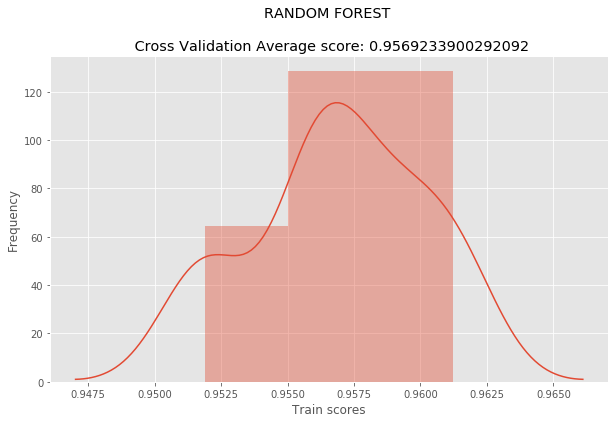

In [189]:
# K-fold cross val
kfold = KFold(shuffle=True, n_splits=5, random_state=0)
cv_results_rf = cross_val_score(rf_random_best, X_train3, y_train3, cv=kfold, scoring='f1_weighted')
plt.figure(figsize=(10,6))
plt.xlabel('Train scores')
plt.ylabel('Frequency')
sns.distplot(cv_results_rf)
plt.title('RANDOM FOREST \n\n Cross Validation Average score: {}'.format(np.mean(cv_results_rf)))
plt.show()

#### Evaluation Metrics

##### Plotting Cross Val score results

In [190]:
from sklearn.model_selection import cross_val_predict

y_rf_pred_train = cross_val_predict(rf_random_best, X_train3, y_train3, cv=5)
y_rf_pred_test = cross_val_predict(rf_random_best, X_test3, y_test3, cv=5)

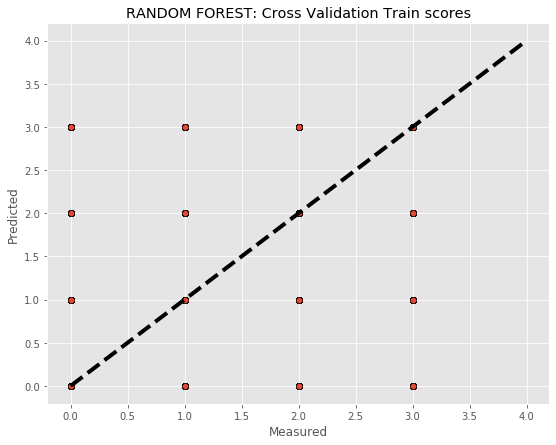

In [191]:
# Random Forest Bagging Cross Validation Train scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_train3, y_rf_pred_train, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('RANDOM FOREST: Cross Validation Train scores')
plt.show()

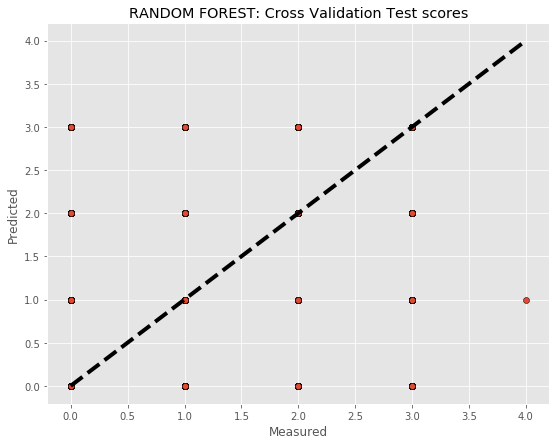

In [192]:
# Random Forest Bagging Cross Validation Test scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_test3, y_rf_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('RANDOM FOREST: Cross Validation Test scores')
plt.show()

##### Classification Report

In [193]:
# classification Report for Train
from sklearn.metrics import classification_report,confusion_matrix
# y_rf_pred_train = rf_random_best.predict(X_train)
print(classification_report(y_train3, y_rf_pred_train))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      9099
           1       0.97      0.96      0.96      6524
           2       0.95      0.96      0.96      5558
           3       0.96      0.94      0.95      6569

    accuracy                           0.96     27750
   macro avg       0.96      0.96      0.96     27750
weighted avg       0.96      0.96      0.96     27750



In [194]:
# classification Report for Test
from sklearn.metrics import classification_report,confusion_matrix
# y_rf_pred_test = rf_random_best.predict(X_test)
print(classification_report(y_test3, y_rf_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      3879
           1       0.96      0.96      0.96      2742
           2       0.95      0.95      0.95      2377
           3       0.96      0.94      0.95      2895
           4       0.00      0.00      0.00         1

    accuracy                           0.95     11894
   macro avg       0.76      0.76      0.76     11894
weighted avg       0.95      0.95      0.95     11894



##### Confusion Matrix

In [195]:
# confusion matrix for Train
print(confusion_matrix(y_train3,y_rf_pred_train))

[[8785   98  105  111]
 [ 134 6265   53   72]
 [ 116   25 5351   66]
 [ 208   89   95 6177]]


In [196]:
# confusion matrix for Test
print(confusion_matrix(y_test3,y_rf_pred_test))

[[3721   46   60   52    0]
 [  58 2631   20   33    0]
 [  58   15 2268   36    0]
 [  85   38   41 2731    0]
 [   0    1    0    0    0]]


##### Cohen Kappa score

In [197]:
# Cohen's Kappa coefficient for Train
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_train3, y_rf_pred_train)

0.9429766263132189

In [198]:
# Cohen's Kappa coefficient for Test
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test3, y_rf_pred_test)

0.9383914004249329